<a href="https://colab.research.google.com/github/Anastasiyofworld/yandex_projects_13/blob/main/project_13_ML_for_texts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Комментарии" data-toc-modified-id="Комментарии-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Комментарии</a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Масштабирование-данных-с-помощью-TF-IDF." data-toc-modified-id="Масштабирование-данных-с-помощью-TF-IDF.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Масштабирование данных с помощью TF-IDF.</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Качество-прогноза" data-toc-modified-id="Качество-прогноза-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Качество прогноза</a></span></li><li><span><a href="#Модель-логистической-регрессии" data-toc-modified-id="Модель-логистической-регрессии-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель логистической регрессии</a></span></li><li><span><a href="#Модель-линейных-опорных-векторов" data-toc-modified-id="Модель-линейных-опорных-векторов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель линейных опорных векторов</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Комментарии" data-toc-modified-id="Комментарии-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Комментарии</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

### Комментарии
<div class="alert alert-info">
<b>Комментарий студента 1 итерация</b>
    
Привет, уважаемый ревьюер!

Я, как могла, пыталась сократить время выполнения тетради, оставив в `GridSearch` только уже подобранные за кучу времени параметры, а вот как сократить время лемматизации не придумала. 

Для себя выгрузила уже лемматизированный `.csv` файл и работала с ним, подбирая гиперпараметры моделей. Но как отправить тебе не знаю, кажется, при получении иногда у ревьюеров перезапускается тетрадка (иначе как еще объяснить, что однажды я посылала отработавшую тетрадь, а у ревьюера она отработала только наполовину и вернулась обратно?), не уверена, что файл подтянется и из моего Гугл-диска, ведь на сервере Яндекса они подтягиваются со спец. папки с файлами. 

Будет круто, если расскажешь, как обходить такое и не тратить время ревьюеров)

А пока добавляю ссылку на мой гитхабчик, по которой должно открыться сразу красивенько, если эта тетрадь закапризничает.

[ссылка на Гитхабчик](https://nbviewer.org/github/Anastasiyofworld/yandex_projects_13/blob/main/project_13_ML_for_texts.ipynb)

</div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

**Наша цель** - обучить модель классифицировать комментарии на позитивные и негативные. 

В нашем распоряжении **набор данных с разметкой о токсичности правок**.

У нас есть строгое указание к метрике качества и ее значению:  `F1` **не меньше 0.75**. 

**Этапы выполнения проекта**

1. Загрузить и подготовить данные.
2. Обучить разные модели. 
3. Сделать выводы.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

Импортируем нужные библиотеки.

In [1]:
!pip install tqdm 
!pip install en_core_web_sm
!pip install langdetect

     |████████████████████████████████| 981 kB 13.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=62504c6e5245a01aa62592bca3e43bdaaa3c70d489dd288363babf07e4b4e926
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [2]:
import pandas as pd
import numpy as np

from langdetect import detect

from matplotlib import pyplot as plt

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

import re

import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm  import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV

from tqdm import notebook

import nltk
from nltk.corpus import wordnet
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [3]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Создаем путь к файлу с данными.

In [4]:
path = '/datasets/toxic_comments.csv'
path2 = '/content/drive/MyDrive/Colab Notebooks/project_13/toxic_comments.csv'
path3 = '/content/drive/MyDrive/Colab Notebooks/project_13/LEMMAS_ALL_line.csv'
path4 = 'LEMMAS_ALL_line.csv'

In [5]:
# for working in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Откроем файл с текстом комментариев и разметкой о токсичности правок.

In [6]:
try:
    df = pd.read_csv(path)
except Exception as err:
    try:
        df = pd.read_csv(path[10:])
    except Exception as err:
        try:
            from google.colab import drive
            df = pd.read_csv(path2)
        except Exception as err:
            print('Ошибка чтения файла df:', repr(err))

In [7]:
# параметр для seed в random_state
STATE = 12345

In [8]:
df.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


В нашем распоряжении 159571 комментарий с разметкой о его токсичности. Первые строчки на английском языке. Проверим, все ли комментарии написаны на одном языке.

In [10]:
# def detect_language(row):
#     try:
#         language = detect(row) 
#     except Exception as error:
#         language = 'error'
#     return language
        

In [11]:
# df['language'] = df['text'].apply(detect_language)

In [12]:
# df['language'].unique()

In [13]:
# detect(df.loc[159566, 'text'])

**Код выше выполняется достаточно долго и после проверки на язык не имеет смысла, поэтому мы позволили себе его закомментировать для более быстрой отработки тетради**

Мы потыкались и убедились, что несмотря на иногда присутствующие другие языки, основная масса отзывов написана на английском.

Посмотрим на соотношение токсичных и нетоксичных комментариев.

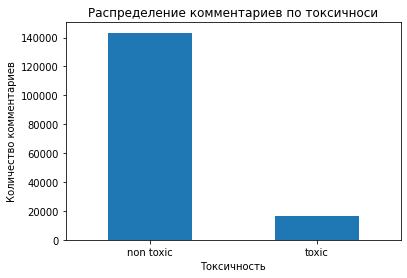

In [14]:
df.groupby('toxic').text.count().sort_values(ascending=False).plot(kind='bar', rot=0)
plt.title('Распределение комментариев по токсичноси')
plt.ylabel('Количество комментариев')
plt.xlabel('Токсичность')
plt.xticks([0, 1], ['non toxic', 'toxic'])
plt.show()

In [15]:
df.toxic.mean()

0.10167887648758234

Видим, что только 10% из комментариев помечены как токсичные. Нужно будет учесть это при разбиении выборок для обучения и предсказания моделей.

Уберем из текста ссылки на страницы.

In [16]:
def delete_links(data):
    data = re.sub(r'^https?:\/\/.*[\r\n]*', '', data, flags=re.MULTILINE)
    return data

In [17]:
df['text'] = df['text'].apply(delete_links)

In [18]:
df.head(20)

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


Заменим основные сокращения английского языка.

In [19]:
df['text'] = df['text'].transform(lambda x: x\
.replace(" won't ", ' will not ')\
.replace("can't ", 'cannot ')\
.replace("n't ", ' not ')\
.replace("'s ", ' is ')\
.replace("'m ", ' am ')\
.replace("'ll ", ' will ')\
.replace("'d ", ' would ') \
.replace("'re ", ' are ')\
.replace("'ve ", ' have ')\
.replace("\n", " ")
                                 )
# yes, "'d" it's a problem

In [20]:
df.head()

,text,toxic
0,Explanation Why the edits made under my userna...,0
1,D'aww! He matches this background colour I am ...,0
2,"Hey man, I am really not trying to edit war. I...",0
3,""" More I cannot make any real suggestions on i...",0
4,"You, sir, are my hero. Any chance you remember...",0


Переведем текст комментариев в нижний регистр и оставим только английские слова.

In [21]:
df['text'] = df['text'].apply(str.lower)

In [22]:
df.head()

,text,toxic
0,explanation why the edits made under my userna...,0
1,d'aww! he matches this background colour i am ...,0
2,"hey man, i am really not trying to edit war. i...",0
3,""" more i cannot make any real suggestions on i...",0
4,"you, sir, are my hero. any chance you remember...",0


In [23]:
df['text'] = df['text'].transform(lambda x: re.sub(r'[^a-z ]', ' ', x))

In [24]:
df.head()

,text,toxic
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i am ...,0
2,hey man i am really not trying to edit war i...,0
3,more i cannot make any real suggestions on i...,0
4,you sir are my hero any chance you remember...,0


Переведем данные в кодировку Юникод.

In [25]:
df['text'] = df['text'].astype('U')

### Лемматизация

Проведем лемматизацию комментариев [с соответствующим POS-тегом](https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/).

In [26]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
%%time
df['text'] = df['text'].transform(lambda x: ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()]))

CPU times: user 16min 25s, sys: 1min, total: 17min 26s
Wall time: 17min 23s


Удалим образовавшиеся пропуски в данных после удаления ссылок и/или стоп-слов.

Разделим данные на тренировочный, валидационный и тестовый набор.

In [29]:
print(df.isna().sum())
df.dropna(inplace=True)

text     0
toxic    0
dtype: int64


In [30]:
X_train_valid, X_test, target_train_valid, target_test = train_test_split(df['text'], df['toxic'], test_size=0.2, random_state=STATE, stratify=df['toxic']) 
X_train, X_valid, target_train, target_valid = train_test_split(X_train_valid, target_train_valid, test_size=0.25, random_state=STATE, stratify=target_train_valid) 

In [31]:
target_train_valid.mean(), target_train.mean(), target_valid.mean(), target_test.mean()

(0.10167951369305007,
 0.10167951369305007,
 0.10167951369305007,
 0.10167632774557418)

### Масштабирование данных с помощью TF-IDF.

При построении пайплайна будем проводить токенизацию комментариев с построением словаря важности известных слов, использовав стоп-слова.

In [32]:
stop_words = set(stopwords.words('english'))
stop_words = set([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in stop_words])

In [33]:
count_tf_idf = TfidfVectorizer()

In [34]:
X_train.shape, X_valid.shape, X_train_valid.shape, X_test.shape 

((95742,), (31914,), (127656,), (31915,))

## Обучение

### Качество прогноза

Для обучения моделей нам понадобится оценить качество прогноза.

У нас есть четкое требование к качеству: значение метрики качества `F1` не меньше 0.75. 

In [35]:
dummy = DummyClassifier(
    strategy = 'stratified', 
    random_state = STATE
    )
dummy.fit(X_train, target_train)

f1_dummy = f1_score(target_valid, dummy.predict(X_valid))

score = dummy.score(X_valid, target_valid)
f1_dummy, score

(0.10048426150121066, 0.8137494516513128)

In [36]:
results = pd.DataFrame(columns=['valid_F1'])
results.loc['dummy', 'valid_F1'] = round(f1_dummy, 2)
results

,valid_F1
dummy,0.1


### Модель логистической регрессии

Построим пайплайн для модели логистической регрессии.

Для модели будем использовать только те токены, которые встречаются по крайней мере в **трех документах** (токен, который встретился только в одном-двух документах, вряд ли встретится в тестовом наборе и поэтому бесполезен). С помощью параметра `min_df` мы можем задать минимальное количество документов, в котором должен появиться токен.



In [37]:
pipe_lr = Pipeline([
    ('vectorizer', count_tf_idf),
    ('model', LogisticRegression()),

])

params_lr = [
    {
        'vectorizer__stop_words': [stop_words],
        'vectorizer__ngram_range': [(1, 2)],
        'vectorizer__min_df': [3],
        'vectorizer__max_df': [
                               0.7, 
                              #  0.8
                               ],
        # 'vectorizer__max_features': [80000],
        'model': [LogisticRegression()],
        # 'model__solver': ['saga'],
        'model__class_weight': ['balanced'],
        'model__n_jobs': [-1],
        'model__random_state': [STATE],
        # 'model__C': np.logspace(-3,3,7), # before
        # # 'model__C': [0.01], # after
        # 'model__penalty': [
                          #  'elasticnet', 
                          #  'l1', 
                          #  'l2', 
                          #  'none'
                          #  ], # before
        # # 'model__penalty': ['l1'], # after
        'model__max_iter': [100000]

    },
]

# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=STATE)
cv = KFold(n_splits=3, shuffle=True, random_state=STATE)

In [38]:
grid_lr = GridSearchCV(pipe_lr, param_grid=params_lr, cv=cv, n_jobs=-1, scoring='f1', verbose=5)

In [39]:
%%time
grid_lr.fit(X_train_valid, target_train_valid)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
CPU times: user 11.9 s, sys: 584 ms, total: 12.5 s
Wall time: 36.4 s


GridSearchCV(cv=KFold(n_splits=3, random_state=12345, shuffle=True),
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LogisticRegression(class_weight='balanced',
                                                       max_iter=100000,
                                                       n_jobs=-1,
                                                       random_state=12345)],
                          'model__class_weight': ['balanced'],
                          'model__max_iter': [100000], 'model__...
                          'vectorizer__max_df': [0.7],
                          'vectorizer__min_df': [3],
                          'vectorizer__ngram_range': [(1, 2)],
                          'vectorizer__stop_words': [{'a', 'about', 'above',
                                                      'after', 'again',
              

In [40]:
lr_f1 = grid_lr.best_score_
print('Best Params:', grid_lr.best_params_)
print()
print('Best F1 Score:', lr_f1)

Best Params: {'model': LogisticRegression(class_weight='balanced', max_iter=100000, n_jobs=-1,
                   random_state=12345), 'model__class_weight': 'balanced', 'model__max_iter': 100000, 'model__n_jobs': -1, 'model__random_state': 12345, 'vectorizer__max_df': 0.7, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2), 'vectorizer__stop_words': {'that', 'herself', 'by', 'y', 'how', "needn't", 'or', 'when', "you're", 'o', 'above', "wasn't", 'yours', 'what', "it's", 'very', "hasn't", 'yourselves', 'aren', 'couldn', "you've", 'an', 'but', 'they', "that'll", 'd', 'out', 'should', 'such', 'he', "wouldn't", 'whom', 'if', 'him', 'below', 'too', 'her', 'where', 'any', 'nor', 'in', "isn't", "won't", 'while', 'at', 'just', 'have', 'here', "haven't", 'will', 'their', "shouldn't", 'more', 'mightn', 'a', 'until', 'do', 'few', 's', "she's", 'you', 'ourselves', 'don', 'the', 'shan', "doesn't", 'himself', 'yourself', 'my', 'haven', "should've", "don't", 'his', 'before', 'doesn', "aren't"

Кросс-валидацией нашли лучшую модель, сохраним ее.

In [41]:
%%time
lr_model = grid_lr.best_estimator_

lr_model.fit(X_train, target_train)
lr_predicts = lr_model.predict(X_valid)
f1_lr = f1_score(target_valid, lr_predicts)
print(f'F1 для модели логистической регрессии равно {f1_lr:.2f}')

F1 для модели логистической регрессии равно 0.75
CPU times: user 10.8 s, sys: 217 ms, total: 11 s
Wall time: 15.3 s


In [42]:
results.loc['logistic regression', 'valid_F1'] = round(f1_lr, 2)
results

,valid_F1
dummy,0.1
logistic regression,0.75


### Модель линейных опорных векторов


Построим пайплайн для модели линейных опорных векторов.

<!-- Тут честно признаюсь, что терпения моего не хватило и воспользовалась помощью коллеги Захара с более мощным компом, спросив, что у него показали многочасовые расчеты. -->

In [43]:
pipe_svc = Pipeline([
    ('vectorizer', count_tf_idf),
    ('model', LinearSVC()),


])

params_svc = [
    {
        'vectorizer__stop_words': [stop_words],
        'vectorizer__ngram_range': [(1, 2)],
        'vectorizer__min_df': [3],
        # 'vectorizer__max_df': [0.7, 0.8],
        'vectorizer__max_df': [0.7],     
        # 'vectorizer__max_features': [80000, None],
        'vectorizer__max_features': [80000],     
        # 'model': [SVC()],
        'model': [LinearSVC()],
        # 'model__class_weight': ['balanced', {0:1, 1:3}],
        'model__class_weight': [{0:1, 1:3}],
        # 'model__n_jobs': [-1],
        'model__random_state': [STATE],
        # 'model__C': np.logspace(-3,3,7),
        'model__C': [0.1], # after
        # 'model__penalty': ['l1', 'l2'],
        'model__penalty': ['l2'],
        'model__max_iter': [100000]

    },
]

In [44]:
grid_svc = GridSearchCV(pipe_svc, param_grid=params_svc, cv=cv, n_jobs=-1, scoring='f1', verbose=3)

In [45]:
%%time
grid_svc.fit(X_train_valid, target_train_valid)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
CPU times: user 17.7 s, sys: 240 ms, total: 18 s
Wall time: 37.6 s


GridSearchCV(cv=KFold(n_splits=3, random_state=12345, shuffle=True),
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('model', LinearSVC())]),
             n_jobs=-1,
             param_grid=[{'model': [LinearSVC(C=0.1, class_weight={0: 1, 1: 3},
                                              max_iter=100000,
                                              random_state=12345)],
                          'model__C': [0.1],
                          'model__class_weight': [{0: 1, 1: 3}],
                          'model__max_iter': [100000], 'model__penalty...
                          'vectorizer__max_features': [80000],
                          'vectorizer__min_df': [3],
                          'vectorizer__ngram_range': [(1, 2)],
                          'vectorizer__stop_words': [{'a', 'about', 'above',
                                                      'after', 'again',
                                             

In [46]:
svc_f1 = grid_svc.best_score_
print('Best Params:', grid_svc.best_params_)
print()
print('Best F1 Score:', svc_f1)

Best Params: {'model': LinearSVC(C=0.1, class_weight={0: 1, 1: 3}, max_iter=100000, random_state=12345), 'model__C': 0.1, 'model__class_weight': {0: 1, 1: 3}, 'model__max_iter': 100000, 'model__penalty': 'l2', 'model__random_state': 12345, 'vectorizer__max_df': 0.7, 'vectorizer__max_features': 80000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2), 'vectorizer__stop_words': {'that', 'herself', 'by', 'y', 'how', "needn't", 'or', 'when', "you're", 'o', 'above', "wasn't", 'yours', 'what', "it's", 'very', "hasn't", 'yourselves', 'aren', 'couldn', "you've", 'an', 'but', 'they', "that'll", 'd', 'out', 'should', 'such', 'he', "wouldn't", 'whom', 'if', 'him', 'below', 'too', 'her', 'where', 'any', 'nor', 'in', "isn't", "won't", 'while', 'at', 'just', 'have', 'here', "haven't", 'will', 'their', "shouldn't", 'more', 'mightn', 'a', 'until', 'do', 'few', 's', "she's", 'you', 'ourselves', 'don', 'the', 'shan', "doesn't", 'himself', 'yourself', 'my', 'haven', "should've", "don't", 'his', 

Кросс-валидацией нашли лучшую модель, сохраним ее.

In [47]:
%%time
svc_model = grid_svc.best_estimator_

svc_model.fit(X_train, target_train)
svc_predicts = svc_model.predict(X_valid)
f1_svc = f1_score(target_valid, svc_predicts)
print(f'F1 для модели линейных опорных векторов равно {f1_svc:.2f}')

F1 для модели линейных опорных векторов равно 0.78
CPU times: user 15.3 s, sys: 240 ms, total: 15.6 s
Wall time: 15.5 s


In [48]:
results.loc['linear svc', 'valid_F1'] = round(f1_svc, 2)
results

,valid_F1
dummy,0.1
logistic regression,0.75
linear svc,0.78


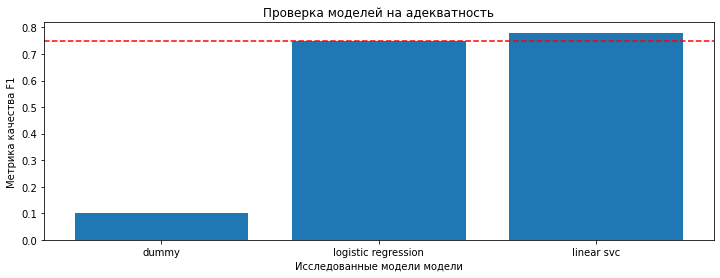

In [49]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.bar(results.index, results.valid_F1)
plt.title('Проверка моделей на адекватность')
plt.axhline(y=0.75, color='r', linestyle='--')
plt.xlabel('Исследованные модели модели')
plt.ylabel('Метрика качества F1')
plt.show()

- Модели обучаются достаточно долго, обучать некоторые модели не поднялась рука (например, случайного леса и градиентного бустинга).
- Для финального тестирования выбрана **модель линейных опорных векторов**.


## Тестирование

Обучим модель линейных опорных векторов на `тренировочной + обучающая` выборках и проверим на `тестировочной`.

In [50]:
%%time
svc_model.fit(X_train_valid, target_train_valid)
svc_predicts_final = svc_model.predict(X_test)
f1_svc_final = f1_score(target_test, svc_predicts_final)
print(f'F1 на тестовой выборке для модели линейных опорных векторов равно {f1_svc_final:.2f}')
print()

F1 на тестовой выборке для модели линейных опорных векторов равно 0.80

CPU times: user 19.7 s, sys: 230 ms, total: 19.9 s
Wall time: 19.8 s


## Выводы

Данный проект был посвященн **поиску токсичных комментариев для интернет-магазина**. 

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. 

Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.

Нашей **задачей** являлось обучить модель **классифицировать комментарии на позитивные и негативные**.

Необходимым условием было построить модель со значением метрики качества **F1 не меньше 0.75**.

В рамках данной работы была проведена **предобработка текста** с приведением комментариев к нижнему регистру, удалению ссылок и лемматизацией. 

Для обучения моделей классифицировать комментарии была применена техника масштабирования данных с помощью **TF-IDF**.

В рамках проекта были обучены модели логистической регрессии и линейных опорных векторов. 


Ввиду ресурсозатратности проекта, приходилось предварительно уменьшать датасет до 5 тысяч строк и на них тестировать, работает ли всё как задуманно. Самый убийственный проект, я думала, у меня загорится комп. И даже оплата Гугл Колаба не особо ускорила процесс, хотя надеюсь, что ускорила. 

Для финального **тестирования** была выбрана **модель линейных опорных векторов**, лучше показавшая себя на кросс-валидации.

**Метрика качества F1** на тестовой выборке равна **0.80**, что согласуется с целью исследования.



### Комментарии
<div class="alert alert-info">
<b>Комментарий студента 1 итерация</b>
    
Уважаемый ревьюер!

В рамках данной работы пыталась прикрутить `StratifiedKFold`, так как у нас есть дисбаланс классов и мне показалось это хорошей идеей. Но ни одна кросс-валидация с ним не пошла (по крайней мере расчет стоял несколько часов и ничего). Можешь подсказать, когда такое используется или я может что-то не так поняла? (Я реально несколько дней думала, что это просто проект такой медленный, а оказалось, что некоторые модели просто не планируют рассчитываться, взяла самые быстрые) Буду рада любым советам, а еще если есть возможность, посоветуй пожалуйста, что хорошего можно посмотреть или почитать по данной теме.

</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны